# Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Create Sample Data (Orders, Customers, Products, Shipping)

In [2]:
# --- Customers Table ---
customers = pd.DataFrame({
    'CustomerID': range(1, 16),
    'Name': ['Customer ' + str(i) for i in range(1, 16)],
    'Location': np.random.choice(['New York', 'California', 'Texas', 'Florida', 'Illinois'], 15),
    'Gender': np.random.choice(['Male', 'Female'], 15),
    'Age': np.random.randint(18, 60, size=15)
})

# --- Products Table ---
products = pd.DataFrame({
    'ProductID': range(101, 111),
    'Category': np.random.choice(['Electronics', 'Clothing', 'Home', 'Books', 'Toys'], 10),
    'Subcategory': ['Sub' + str(i) for i in range(1, 11)],
    'Brand': ['Brand' + str(i) for i in range(1, 11)]
})

# --- Orders Table ---
orders = pd.DataFrame({
    'OrderID': range(1001, 1021),
    'CustomerID': np.random.choice(customers['CustomerID'], 20),
    'ProductID': np.random.choice(products['ProductID'], 20),
    'OrderDate': pd.date_range(start='2023-01-01', periods=20, freq='15D'),
    'Quantity': np.random.randint(1, 5, size=20),
    'Price': np.random.randint(20, 200, size=20)
})

# --- Shipping Table ---
shipping = pd.DataFrame({
    'OrderID': orders['OrderID'],
    'ShippingDate': orders['OrderDate'] + pd.to_timedelta(np.random.randint(1, 10, size=20), unit='D'),
    'ShippingMode': np.random.choice(['Standard', 'Express', 'Same Day'], 20),
    'DeliveryTime': np.random.randint(1, 10, size=20)  # in days
})

# Step 3: Merge Data for Analysis

In [3]:
df = orders.merge(customers, on='CustomerID', how='left') \
           .merge(products, on='ProductID', how='left') \
           .merge(shipping, on='OrderID', how='left')

# Calculate Revenue
df['Revenue'] = df['Quantity'] * df['Price']
df.head()

,OrderID,CustomerID,ProductID,OrderDate,Quantity,Price,Name,Location,Gender,Age,Category,Subcategory,Brand,ShippingDate,ShippingMode,DeliveryTime,Revenue
0,1001,4,102,2023-01-01,2,151,Customer 4,Texas,Male,34,Electronics,Sub2,Brand2,2023-01-07,Same Day,8,302
1,1002,14,101,2023-01-16,4,28,Customer 14,Florida,Male,41,Electronics,Sub1,Brand1,2023-01-17,Express,4,112
2,1003,12,110,2023-01-31,2,28,Customer 12,New York,Male,55,Clothing,Sub10,Brand10,2023-02-07,Standard,9,56
3,1004,6,108,2023-02-15,3,116,Customer 6,New York,Male,27,Electronics,Sub8,Brand8,2023-02-22,Same Day,5,348
4,1005,4,103,2023-03-02,3,98,Customer 4,Texas,Male,34,Books,Sub3,Brand3,2023-03-04,Express,2,294


# Step 4: Time-Series Analysis

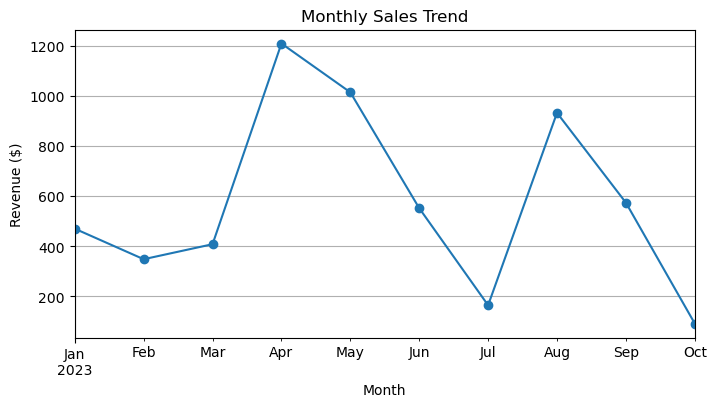

In [5]:
df['Month'] = df['OrderDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Revenue'].sum()

plt.figure(figsize=(8,4))
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Revenue ($)')
plt.grid(True)

plt.savefig("monthly_sales_trend.png", dpi=300, bbox_inches='tight')
plt.show()

# Step 5: Top 10 Products by Revenue

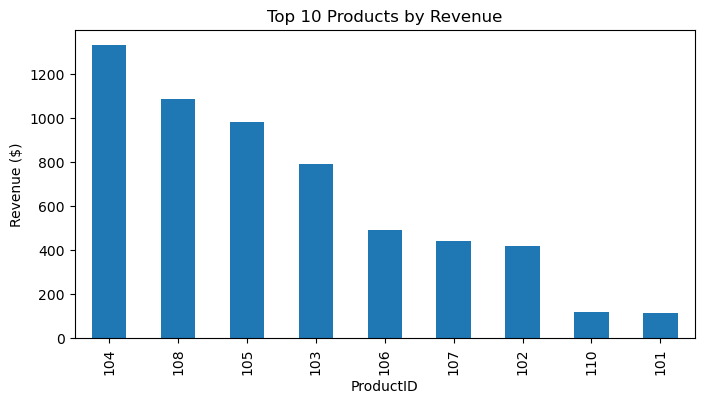

In [6]:
top_products = df.groupby('ProductID')['Revenue'].sum().nlargest(10)

plt.figure(figsize=(8,4))
top_products.plot(kind='bar')
plt.title('Top 10 Products by Revenue')
plt.ylabel('Revenue ($)')
plt.savefig("top_products_revenue.png", dpi=300, bbox_inches='tight')
plt.show()

# Step 6: Revenue by Location

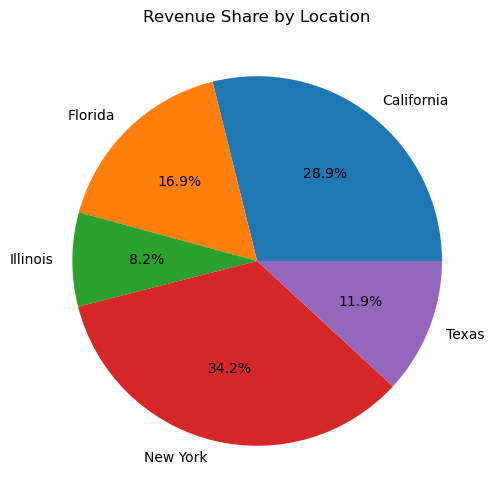

In [7]:
location_sales = df.groupby('Location')['Revenue'].sum()

plt.figure(figsize=(6,6))
location_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title('Revenue Share by Location')
plt.ylabel('')
plt.savefig("revenue_share_by_location.png", dpi=300, bbox_inches='tight')
plt.show()

# Step 7: Customer Segmentation by Age Group

C:\Users\Farhan Diwan\AppData\Local\Temp\ipykernel_22484\3307548643.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sales = df.groupby('AgeGroup')['Revenue'].sum()


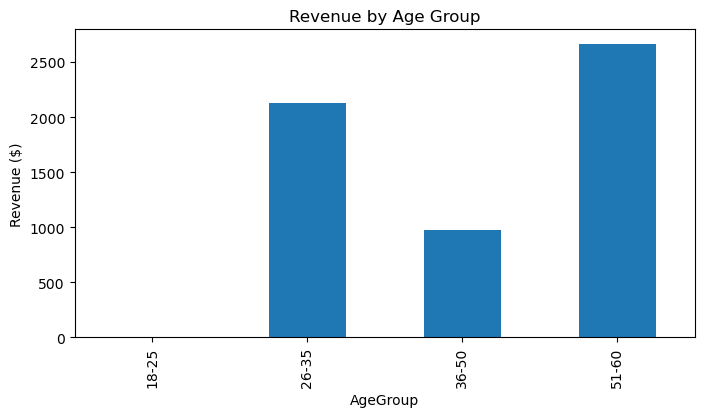

In [8]:
bins = [18, 25, 35, 50, 60]
labels = ['18-25', '26-35', '36-50', '51-60']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_sales = df.groupby('AgeGroup')['Revenue'].sum()

plt.figure(figsize=(8,4))
age_sales.plot(kind='bar')
plt.title('Revenue by Age Group')
plt.ylabel('Revenue ($)')
plt.savefig("revenue_by_age_group.png", dpi=300, bbox_inches='tight')
plt.show()

# Step 8: Delivery Performance Analysis

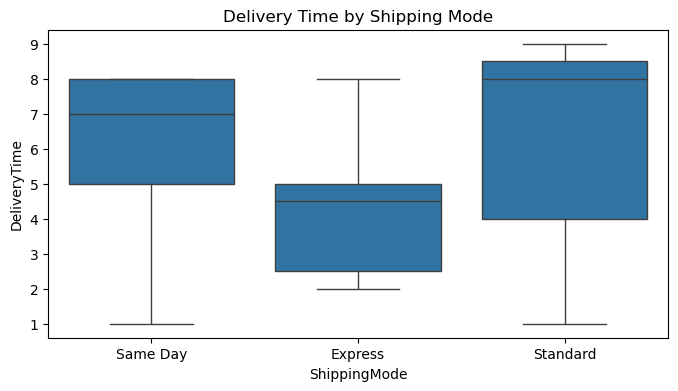

In [9]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='ShippingMode', y='DeliveryTime')
plt.title('Delivery Time by Shipping Mode')
plt.savefig("delivery_time_by_shipping_mode.png", dpi=300, bbox_inches='tight')
plt.show()

# Step 9: Heatmap - Sales by State & Month

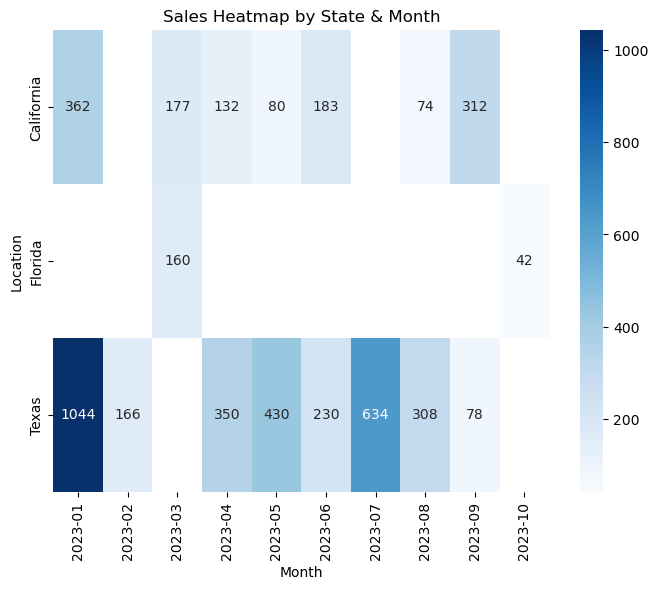

<Figure size 640x480 with 0 Axes>

In [17]:
heatmap_data = df.groupby(['Location', 'Month'])['Revenue'].sum().unstack()

plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='Blues')
plt.title('Sales Heatmap by State & Month')
plt.savefig("sales_heatmap_by_state_month.png", dpi=300, bbox_inches='tight')
plt.show()


# Step 10: Save Processed Data

In [11]:
df.to_csv('ecommerce_sales_analysis.csv', index=False)
print("Data saved as ecommerce_sales_analysis.csv")

Data saved as ecommerce_sales_analysis.csv
